In [1]:
#!/usr/bin/env python

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, expon
from numpy.random import rand

The rejection sampling idea<br>
- Our goal is to generate samples from $p(x)$ <br>
- However, we can do it directly, so we use a proposal distribution $q(x)$<br>
- By generating samples from $q(x)$, we can use rejection sampling to get samples from $p(x)$.

The rejection sampling Algorithm<br>
- Step 1: Pick a constant k to multiply such that $k q(x) > p(x)$<br>
- Step 2: Sample from our proposal distribution, let's call the sample $x_1$ <br>
- Step 3: If $kq(x_1)*rand() < p(x_1)$ then we accept the sample $x_1$ as a newly generated sample<br>
- Step 4: Repeat this to continue to gather samples. 

 proposal distribution

In [3]:
def kq(x):
	return 2*expon.pdf(x, loc=0, scale=6)

In [4]:
def reject_sampling(n):
	X = []
	while len(X) < n:
		s = expon.rvs(loc=0, scale=6)
		if kq(s)*rand() < chi2.pdf(s,3):
			X.append(s)
	return X

Notice that kq(x) is always larger than $p(x)$

In [5]:
x = np.linspace(0, 20, 100)
y = chi2.pdf(x,3)
y2 = kq(x)

In [6]:
X = reject_sampling(10000)

Notice that the histogram generated fix the chi2 distribution perfectly

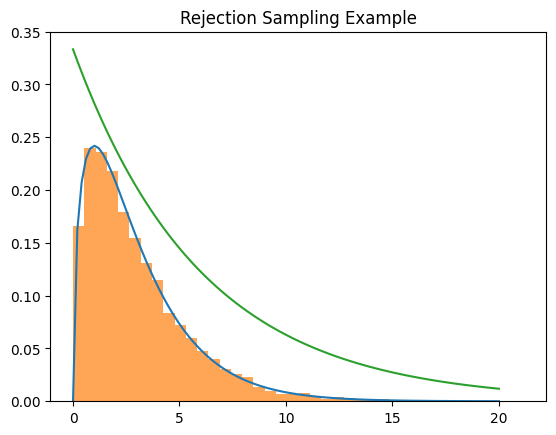

In [7]:
plt.plot(x,y)
plt.hist(X, density=True, bins=40, alpha=0.7)
plt.plot(x,y2)
plt.title('Rejection Sampling Example')
plt.show()